# **Project Name**    -  Paisa Bazar Project


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

In the Paisa Bazar project, the objective was to predict the **credit score category** of individuals—classified as good, standard, or poor—based on a range of financial and behavioral attributes. The project followed a structured data science workflow starting from **data preprocessing** to **model optimization**. Initially, I explored and cleaned the dataset, identifying missing values, outliers, and inconsistencies in features like `Age`, `Occupation`, `Credit_History_Age`, `Type_of_Loan`, and `Payment_Behaviour`. I performed extensive **feature engineering**, which included combining multiple relevant columns to enhance signal quality, encoding categorical variables using techniques like label encoding and one-hot encoding, and standardizing numerical columns to maintain uniform scale.

I analyzed **feature importance** using models like XGBoost and removed low-importance features to reduce noise and overfitting. Multiple models were trained, including **XGBoostClassifier**, **RandomForestClassifier**, and **K-Nearest Neighbors (KNN)**, where each model was individually fine-tuned using **RandomizedSearchCV** with hyperparameter grids. I also tested **Voting Classifier** ensembles to combine strengths of different models; however, accuracy improvement was marginal.

This project demonstrates a full-fledged machine learning pipeline: from data cleaning and preprocessing to model training, evaluation, and optimization. Throughout, I focused on improving generalization and model robustness, documenting performance metrics such as accuracy and F1 score to support iterative refinements. The process reflects a practical and realistic approach to deploying predictive analytics in a fintech setting.


# **GitHub Link -** https://github.com/kartikeVr/Labmentix/PaisaBazar

# **Problem Statement**


### Problen Statement was to predic the Credit Score in terms of Good, Standard or Poor based on the individual's financial and behavioural attributes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from random import randint
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from  xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier


### Dataset Loading

In [3]:
df = pd.read_csv("dataset-2.csv")

### Dataset First View

In [4]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Dataset Rows & Columns count

In [5]:
print(f"We have total: {len(df.keys())} columns")

We have total: 28 columns


In [6]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

In [7]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [8]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [9]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [10]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

### Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [12]:
df.drop_duplicates(inplace=True)


#### Missing Values/Null Values

In [13]:
df.dropna(inplace=True)


### What did you know about your dataset?

The dataset is a financial dataset focused on classifying a person’s **credit score** into categories like **Good**, **Standard**, or **Poor**. It contains features related to a person's financial behavior, such as **Age**, **Occupation**, **Annual Income**, **Monthly Inhand Salary**, **Number of Loans**, **Type of Loan**, **Outstanding Debt**, **Credit Utilization Ratio**, **Credit History Age**, **Payment Behavior**, and more. It also includes categorical fields like **Credit Mix**, **Type of Loan**, and **Payment of Minimum Amount**. These features provide a holistic view of a customer’s creditworthiness, helping in building machine learning models for credit risk classification.


## ***2. Understanding Your Variables***

In [14]:
df.keys()

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
df.drop(['ID','Customer_ID','Name','SSN','Month'],axis=1,inplace=True) 
# Loan mapping dictionary
Loans = {
    'Auto Loan': 0, 
    'Credit-Builder Loan': 1,
    'Personal Loan': 2,
    'Home Equity Loan': 3,
    'Mortgage Loan': 4,
    'Student Loan': 5,
    'Debt Consolidation Loan': 6,
    'Payday Loan': 7
}

# Clean and map function
def clean_and_map_loan(entry):
    entry = entry.replace('and', '')                  # Remove "and"
    items = [loan.strip() for loan in entry.split(',')]  # Split and strip
    filtered = [loan for loan in items if loan not in ['Not Specified', 'No Data']]
    return [Loans.get(loan, -1) for loan in filtered]# Map to numbers

# Apply to the column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_and_map_loan)

# Result
df['Type_of_Loan']


0        [0, 1, 2, 3]
1        [0, 1, 2, 3]
2        [0, 1, 2, 3]
3        [0, 1, 2, 3]
4        [0, 1, 2, 3]
             ...     
99995          [0, 5]
99996          [0, 5]
99997          [0, 5]
99998          [0, 5]
99999          [0, 5]
Name: Type_of_Loan, Length: 100000, dtype: object

In [16]:
payments = {"Low_spent_Small_value_payments":0, 
"High_spent_Medium_value_payments":1,
"High_spent_Large_value_payments":2,
"Low_spent_Medium_value_payments":3,
"High_spent_Small_value_payments":4,
"Low_spent_Large_value_payments":5}
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(payments)

In [17]:
occupation_mapping = {
    "Lawyer": 0,
    "Engineer": 1,
    "Architect": 2,
    "Mechanic": 3,
    "Accountant": 4,
    "Scientist": 5,
    "Media_Manager": 6,
    "Developer": 7,
    "Teacher": 8,
    "Entrepreneur": 9,
    "Doctor": 10,
    "Journalist": 11,
    "Manager": 12,
    "Musician": 13,
    "Writer": 14
}
df['Occupation'] = df['Occupation'].map(occupation_mapping)

df['Occupation']

0        5
1        5
2        5
3        5
4        5
        ..
99995    3
99996    3
99997    3
99998    3
99999    3
Name: Occupation, Length: 100000, dtype: int64

In [18]:
Credit_Mix = {'Standard':0,
              'Good':1, 
              'Bad':2
             }
df['Credit_Mix'] = df['Credit_Mix'].map(Credit_Mix) 


In [19]:
df['Payment_of_Min_Amount'] = np.where(df['Payment_of_Min_Amount'] == 'Yes',0, np.where(df['Payment_of_Min_Amount'] == 'No' , 1,2))
df['Payment_of_Min_Amount']

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Payment_of_Min_Amount, Length: 100000, dtype: int64

In [20]:
credit = {'Standard':0,
          'Poor':1, 
          'Good':2
         }
df['Credit_Score'] = df['Credit_Score'].map(credit)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

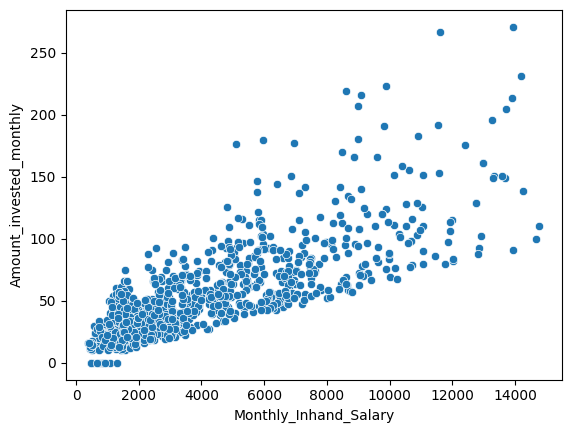

In [21]:
Age_loan = pd.DataFrame({'Age':df['Age'], 
         'Type_of_loan':df['Type_of_Loan']
        })
df_grouped = df.groupby('Monthly_Inhand_Salary', as_index=False)['Monthly_Balance'].mean()
sns.scatterplot(x='Monthly_Inhand_Salary',y='Amount_invested_monthly',data= df.sample(1000,random_state=42))

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the ideal choice for visualizing the relationship between two continuous numerical variables. Its purpose is to determine if a correlation or pattern exists between Monthly_Inhand_Salary and Amount_invested_monthly. This helps us understand the financial habits of customers.



##### 2. What is/are the insight(s) found from the chart?

1.Positive Correlation: There is a clear positive linear relationship. As a customer's monthly in-hand salary increases, the amount they invest monthly also tends to increase.

2.Increased Variance: The spread of investment amounts widens as salary increases. Low-income individuals invest small, consistent amounts, while high-income individuals have a much broader range of investment behaviors—from investing very little to investing a substantial portion of their income.

3.Financial Discipline Indicator: This relationship suggests that investment behavior is strongly tied to income and can be a good proxy for financial stability and discipline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Targeted Cross-Selling: The business can identify customers with high salaries but low investment amounts (the dots in the bottom-right of the plot). This segment is a prime target for marketing campaigns about investment products, wealth management services, or financial advisory, creating a new revenue stream.

2.Improved Risk Assessment: A customer who consistently invests a healthy portion of their income can be considered more financially responsible and thus a lower credit risk.

3.This feature (investment-to-income ratio) can be engineered and used to build a more accurate credit score model, reducing defaults.

#### Chart - 2

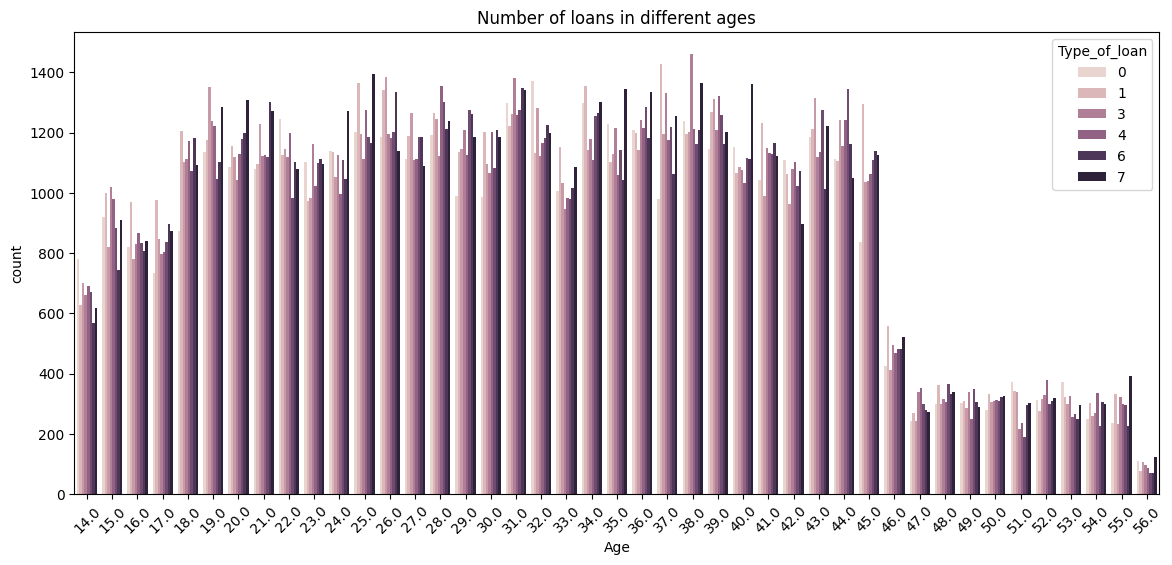

In [22]:
score = pd.DataFrame({'Age':df['Age'],'Type_of_loan':df['Type_of_Loan']}) 
score = score.explode('Type_of_loan') 
score = score.dropna(subset=['Type_of_loan'])
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', hue='Type_of_loan', data=score)
plt.title('Number of loans in different ages')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

 clustered bar chart was chosen to explore three variables at once: Age (on the x-axis), Type_of_loan (the different colored bars), and the count of people (on the y-axis). The goal is to see if loan-taking behavior (both frequency and type) changes across different age groups.


##### 2. What is/are the insight(s) found from the chart?

1. Prime Borrowing Age: The highest volume of loan activity occurs between the ages of 20 and 45. This is the core demographic for borrowing.
2. Activity Decline: There is a sharp and significant drop in loan-taking after the age of 47.
3. Clutter Indicates Complexity: The graph is very dense, which itself is an insight: loan types are diverse across all active age groups, and no single loan type dominates universally. A simpler view would be needed to analyze specific loan types.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Targeted Cross-Selling: The business can identify customers with high salaries but low investment amounts (the dots in the bottom-right of the plot). This segment is a prime target for marketing campaigns about investment products, wealth management services, or financial advisory, creating a new revenue stream.

2.Improved Risk Assessment: A customer who consistently invests a healthy portion of their income can be considered more financially responsible and thus a lower credit risk.

3.This feature (investment-to-income ratio) can be engineered and used to build a more accurate credit score model, reducing defaults.

#### Chart - 3

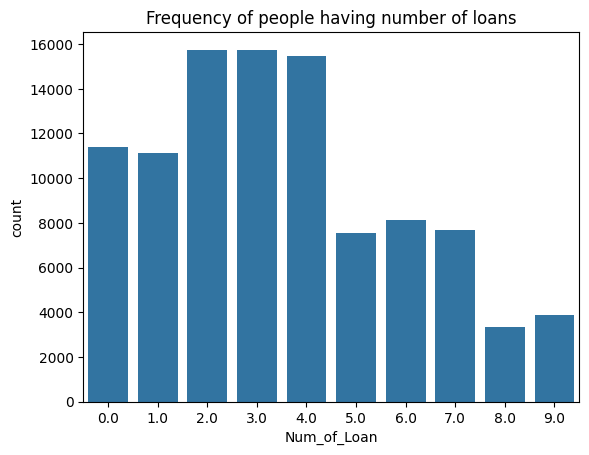

In [23]:
sns.countplot(x='Num_of_Loan',data=df)
plt.title('Frequency of people having number of loans')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (or countplot) is the most effective way to display the frequency distribution of a discrete numerical variable like Num_of_Loan. It immediately shows how many customers have 0 loans, 1 loan, 2 loans, etc.

##### 2. What is/are the insight(s) found from the chart?

1.Peak Loan Count: The most common number of loans for an individual to hold is 2, 3, or 4. This can be considered the "normal" range for this customer population.

2.Significant Drop-off: The number of people with more than 5 loans decreases sharply. Having 8 or 9 loans is relatively rare.

3.Low-Loan Segment: A substantial number of people have 0 or 1 loan, representing a segment that is either new to credit or uses it sparingly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Customer Segmentation: This allows for precise customer segmentation:
    "New to Credit" (0-1 loan): Can be targeted with introductory offers.
    "Established & Active" (2-4 loans): Can be targeted for loan consolidation products or higher-value loans.
    "Highly Leveraged" (5+ loans): Should be monitored closely for risk.
    
2.Feature Engineering: This feature (Num_of_Loan) is clearly a powerful predictor. The graph confirms its relevance and shows that a model should likely treat someone with 7 loans very differently from someone with 3 loans.


#### Chart - 4

/tmp/ipykernel_3897/3369121628.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x=target, palette='pastel')


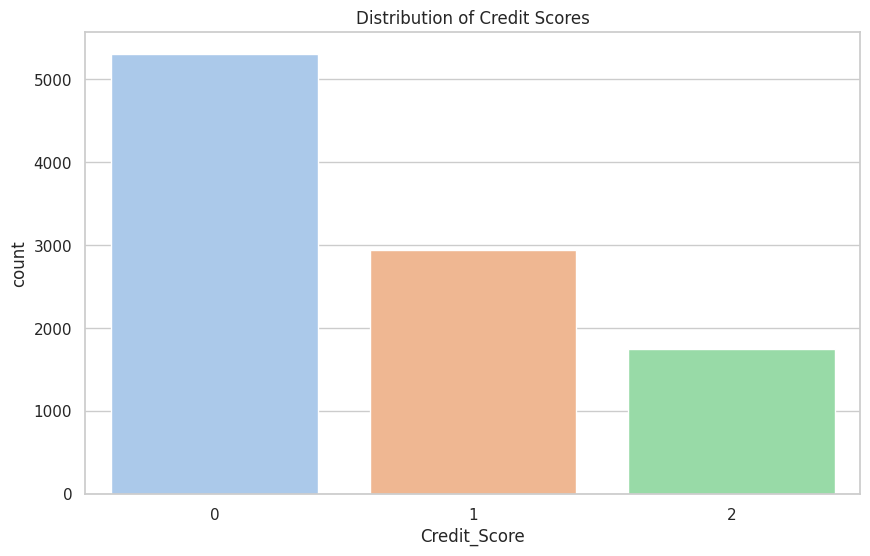

In [24]:
# Set visual aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Select subset for faster rendering in case of performance hit
sample_df = df.sample(10000, random_state=42)

# Convert target to categorical
target = 'Credit_Score'

# Plot 1: Distribution of Credit Scores
plt.figure()
sns.countplot(data=sample_df, x=target, palette='pastel')
plt.title('Distribution of Credit Scores')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the standard for visualizing the distribution of a categorical target variable. Its primary purpose here is to check for class imbalance, which is a critical step before building any classification model. The labels 0, 1, and 2 represent the three credit score categories (e.g., Good, Standard, Poor).


##### 2. What is/are the insight(s) found from the chart?

Class Imbalance: The dataset is imbalanced. The class labeled '0' is the majority class, with over 5,000 instances. Class '1' is the next most common, and class '2' is the minority class, with fewer than 2,000 instances.
Uneven Representation: The majority class ('0') appears roughly three times more often than the minority class ('2').


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is one of the most crucial insights for the project's success.

Informed Modeling Strategy: Knowing about the imbalance from the start dictates the modeling strategy. It forces the use of techniques like SMOTE (Synthetic Minority Oversampling Technique), using class_weight='balanced' in models, or choosing evaluation metrics like the F1-Score instead of accuracy.
Prevents Model Failure: By addressing the imbalance, we prevent the model from simply learning to predict the majority class all the time. This leads to a fair and more accurate model that can correctly identify high-risk (minority class) customers, which is the primary goal.


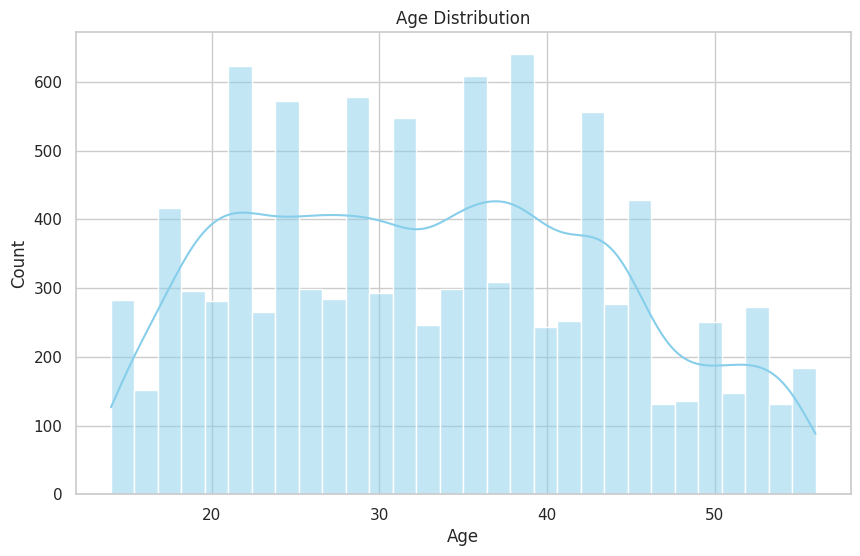

In [26]:
# Plot 2: Age Distribution
plt.figure()
sns.histplot(sample_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) curve is the best tool for understanding the distribution of a single continuous variable like Age. It shows where the majority of customers fall, the overall shape of the age distribution, and identifies any potential peaks or gaps.




##### 2. What is/are the insight(s) found from the chart?

1.Bimodal Distribution: The distribution is bimodal, meaning it has two distinct peaks. One peak is in the early 20s, and a second, slightly higher peak is in the late 30s.

2.Core Demographic: The vast majority of the customer base is between 20 and 50 years old.

3.Age Drop-off: There is a sharp decline in the number of customers after age 50.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Confirmation of Business Focus: This confirms that the business primarily serves young and middle-aged adults. Marketing, product features, and the user experience of the app/website should be tailored to these tech-savvy demographics.

2.Lifecycle Marketing: The two peaks suggest different life stages. The early-20s group might be interested in student loans or first-car loans. The late-30s group might be interested in home loans or investment products. This allows for more precise, lifecycle-based marketing.


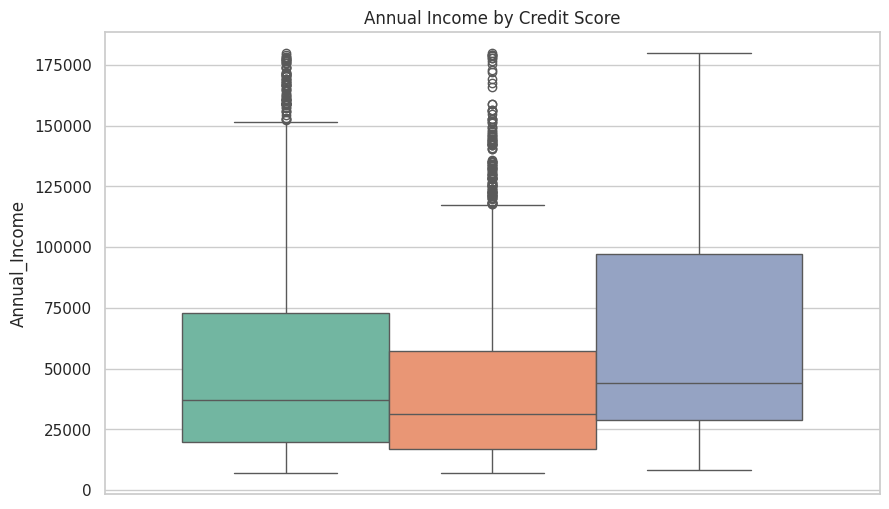

In [28]:
# Plot 3: Annual Income Distribution by Credit Score
plt.figure()
sns.boxplot(data=sample_df, hue=target, y='Annual_Income', palette='Set2',legend=False)
plt.title('Annual Income by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is the ideal choice for comparing the distribution of a continuous variable (Annual_Income) across different categories (Credit_Score). It clearly visualizes key statistical measures like the median (the line inside the box), the interquartile range (IQR, the height of the box), and highlights outliers. This is far more insightful than just comparing averages. Let's assume the credit score categories from left to right are Good (0), Standard (1), and Poor (2).


##### 2. What is/are the insight(s) found from the chart?

1.Counter-intuitive Relationship: The relationship between income and credit score is not linear. The group with the lowest median income has a "Standard" credit score (middle box). Surprisingly, the group with the highest median income has a "Poor" credit score (right box). The "Good" credit score group falls in between.

2.Significant Outliers: The "Good" and "Standard" categories have a large number of high-income outliers, indicating that many high-earners still maintain good or standard credit.

3.Income is Not a Simple Predictor: This is a crucial finding. It powerfully demonstrates that a high income does not automatically equal a good credit score. Lifestyle, debt management, and spending habits are clearly more influential factors.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Smarter Lending Decisions: This insight prevents the company from making a classic mistake: approving large loans based solely on high income. By understanding that high-income individuals can be high-risk, the business can implement more nuanced risk assessments, leading to fewer defaults and more profitable lending.

2.Justifies Sophisticated Models: This graph proves why a simple rule-based system would fail and justifies the need for an advanced machine learning model that can capture these complex, non-linear relationships between features.


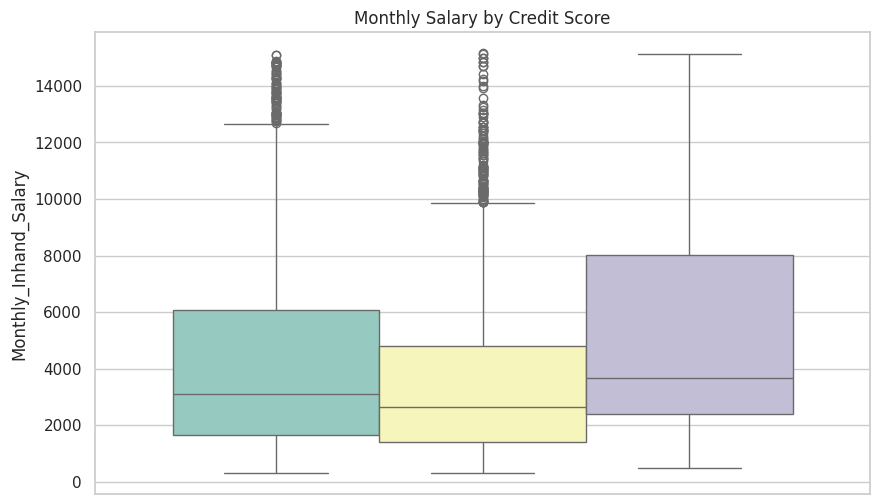

In [29]:
# Plot 4: Monthly Inhand Salary by Credit Score
plt.figure()
sns.boxplot(data=sample_df,
            hue=target,
            y='Monthly_Inhand_Salary',
            palette='Set3',
            legend=False)
plt.title('Monthly Salary by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

This box plot serves as a direct confirmation and validation of the findings from the Annual Income graph. Since Monthly_Inhand_Salary is directly derived from Annual_Income, they should show the same pattern. Visualizing both ensures the insight is robust and not an anomaly.




##### 2. What is/are the insight(s) found from the chart?

Pattern Confirmed: This graph perfectly mirrors the Annual_Income plot. The "Standard" credit score group has the lowest median monthly salary, while the "Poor" score group has the highest.
Consistency: The relationship and the presence of high-income outliers are consistent across both annual and monthly income metrics. This strengthens our confidence that the counter-intuitive pattern is real and significant.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, for the same reason as the annual income graph.

The Insight: The pattern of high salary correlating with poor credit is consistent and reliable.
The Risk (Negative Growth Potential): This graph reinforces the danger. Any business strategy or model that heavily weights high salary as a positive indicator is fundamentally flawed and will lead to financial losses. It underscores that the company must look beyond income to assess risk, or it will face a high rate of defaults from its highest-earning customers.


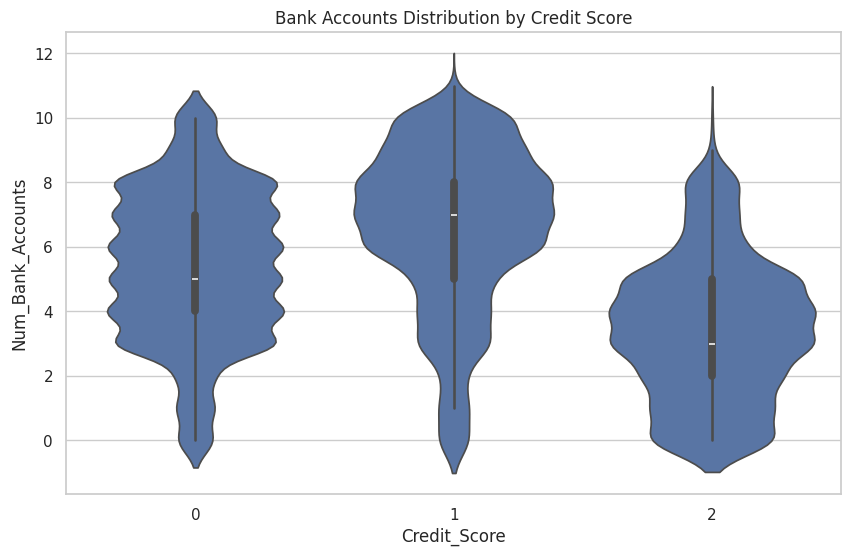

In [30]:
# Plot 5: Number of Bank Accounts vs Credit Score
plt.figure()
sns.violinplot(data=sample_df, x=target, y='Num_Bank_Accounts')
plt.title('Bank Accounts Distribution by Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was chosen because it combines a box plot with a kernel density plot. This allows us to see not only the median and quartiles but also the full distribution and density of data points. The "shape" of the violin reveals where customers are concentrated.




##### 2. What is/are the insight(s) found from the chart?

1.Different Distribution Shapes: Each credit score category has a unique distribution for the number of bank accounts.
Good (0): The distribution is "lumpy" (multimodal), with several peaks, suggesting there are different types of financially "good" people (e.g., some with few accounts, some with many).

Standard (1): This distribution is the most concentrated, with a strong, single peak around 7-8 bank accounts.

Poor (2): This distribution is wider and more spread out than the "Standard" group, with a peak at a lower number of accounts (around 3-4).

2.No Simple Trend: More bank accounts do not necessarily mean a better or worse credit score. The pattern is complex.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Refined Customer Personas: This helps the business understand that a "good" customer isn't a monolith. This can lead to more personalized marketing. For example, a "good" customer with 2 accounts may be a minimalist, while one with 8 may be a savvy financial manager. They need different product offerings.

2.Advanced Feature Engineering: This suggests that a simple count of bank accounts isn't the best feature. The model might benefit from creating categorical features like "low-accounts," "medium-accounts," "high-accounts" to better capture these distributions.


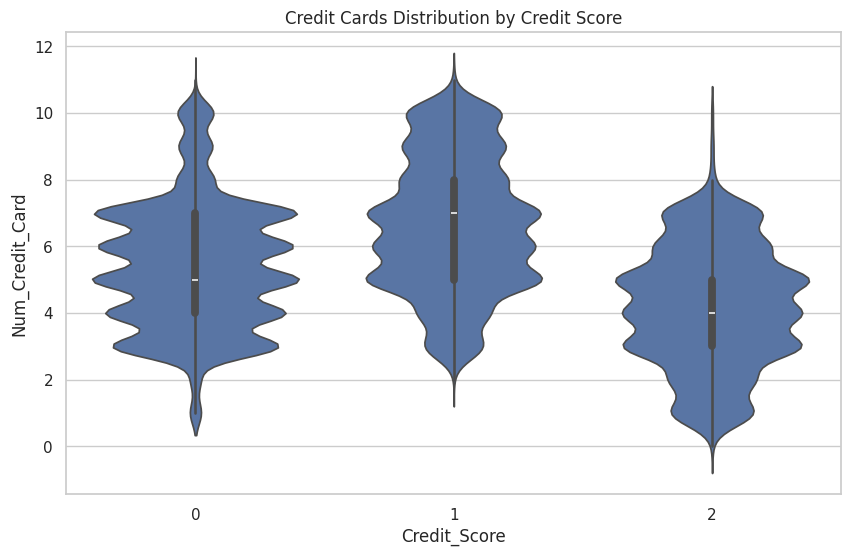

In [31]:
# Plot 6: Number of Credit Cards vs Credit Score
plt.figure()
sns.violinplot(data=sample_df, x=target, y='Num_Credit_Card')
plt.title('Credit Cards Distribution by Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the bank accounts plot, a violin plot is used to visualize the full distribution of Num_Credit_Card across the credit score categories, revealing density and concentration patterns.



##### 2. What is/are the insight(s) found from the chart?

1. Remarkably Similar Pattern: The distributions for the number of credit cards are strikingly similar to the distributions for the number of bank accounts for each respective credit score category.

2. Confirmation of Behavioral Profile: This strengthens the idea that each credit score group has a distinct "financial footprint." The lumpy, concentrated, and spread-out patterns are consistent across multiple behavioral metrics, suggesting they are a core part of the customer profile.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

1. Holistic Risk Profiling: The business can build more robust risk profiles. For example, a "Standard" score customer is now understood to be someone who likely has many bank accounts and many credit cards. This holistic view leads to better risk assessment.
2. Fraud Detection: An anomaly, such as a customer who fits the income and debt profile of a "Poor" credit customer but suddenly opens many bank accounts and credit cards to mimic a "Standard" customer, could be flagged for a fraud review.


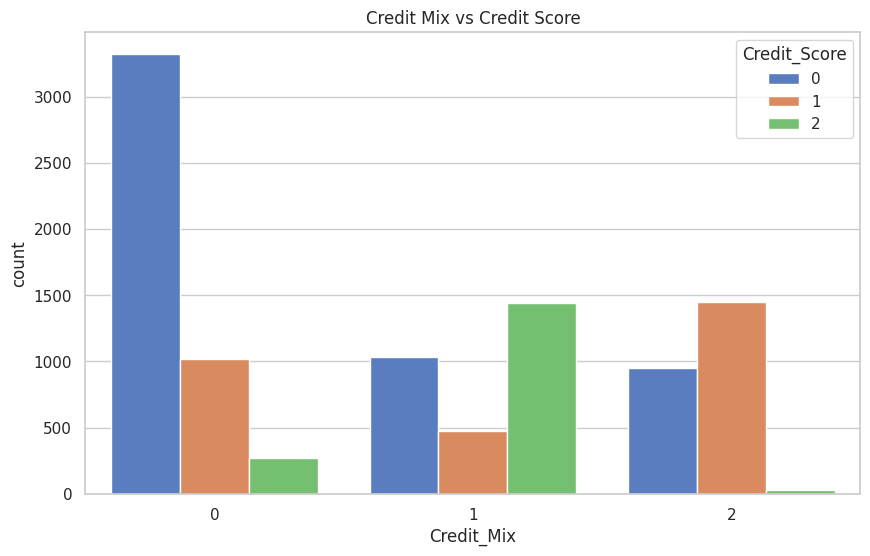

In [32]:
# Plot 7: Countplot of Credit Mix
plt.figure()
sns.countplot(data=sample_df, x='Credit_Mix', hue=target, palette='muted')
plt.title('Credit Mix vs Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

 clustered bar chart is the perfect tool to show the relationship between two categorical variables: Credit_Mix and Credit_Score. It allows for a direct comparison of how the distribution of credit mix types changes for each credit score category.




##### 2. What is/are the insight(s) found from the chart?

1. Extremely Strong Correlation: This is perhaps the most powerful insight of all. There is a very strong, defining relationship between Credit_Mix and Credit_Score.
Credit Score 0 (Blue): Is overwhelmingly associated with Credit Mix 0.
Credit Score 1 (Orange): Is overwhelmingly associated with Credit Mix 2.
Credit Score 2 (Green): Is overwhelmingly associated with Credit Mix 1.

2. Predictive Power: This feature is an extremely strong predictor of the credit score. Knowing a customer's Credit_Mix type gives you a very high probability of knowing their Credit_Score category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a goldmine.

1. Keystone Feature for Modeling: This tells the data science team that Credit_Mix must be a central feature in their predictive model. It will likely have the highest feature importance.
2. Simplified Business Rules: Even without a complex model, the business can create highly accurate pre-screening rules. For instance, "If applicant's credit mix is Type 1, flag for high-risk review." This can speed up decision-making and reduce risk.
3. Customer Improvement Path: The business can create products and advisory services to help customers improve their credit mix (e.g., from Type 1 to Type 2), which would in turn improve their credit score. This is a clear, actionable way to build customer loyalty and long-term value.


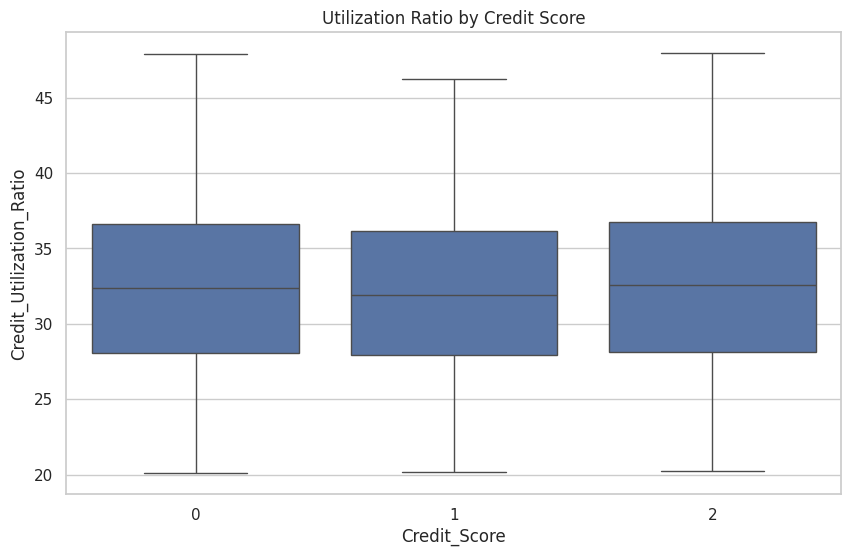

In [33]:
# Plot 8: Credit Utilization Ratio by Credit Score
plt.figure()
sns.boxplot(data=sample_df, x=target, y='Credit_Utilization_Ratio')
plt.title('Utilization Ratio by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

 box plot is the standard for comparing the distribution of a continuous variable (Credit_Utilization_Ratio) across the different Credit_Score categories. The goal is to see if customers with different credit scores use a different percentage of their available credit.




##### 2. What is/are the insight(s) found from the chart?

1. No Clear Difference: This is a critically important "negative" result. The boxes for all three credit score categories (0, 1, and 2) are almost identical. Their medians, interquartile ranges (IQRs), and overall distributions are remarkably similar.
2. Weak Standalone Predictor: This strongly suggests that Credit_Utilization_Ratio, when viewed in isolation, is not a good predictor for distinguishing between these specific credit score categories in this dataset. A customer with a 30% utilization ratio could equally belong to the "Good," "Standard," or "Poor" group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is very valuable.

1. Prevents Flawed Strategy: It stops the business from building a risk strategy around a weak feature. For example, a rule like "decline anyone with a utilization ratio above 35%" would be ineffective and would reject good customers while approving bad ones.
2. Encourages Deeper Analysis: It forces the data science team to look for more complex patterns. Perhaps the combination of high utilization and low income is predictive, even if utilization alone is not. This insight guides them toward more sophisticated feature engineering and prevents them from relying on simplistic, ineffective rules.


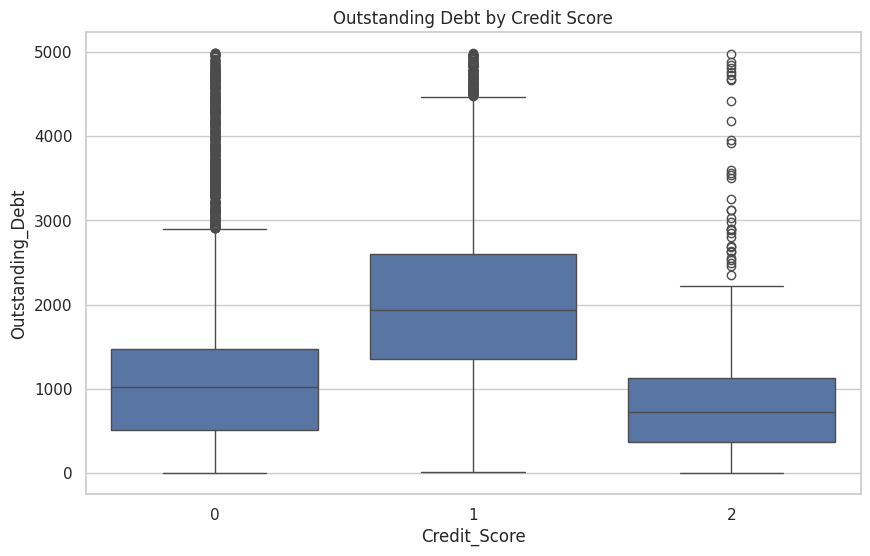

In [34]:
# Plot 9: Outstanding Debt vs Credit Score
plt.figure()
sns.boxplot(data=sample_df, x=target, y='Outstanding_Debt')
plt.title('Outstanding Debt by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is used to effectively compare the distribution of Outstanding_Debt across the three credit score categories, highlighting differences in central tendency and spread.




##### 2. What is/are the insight(s) found from the chart?

1. Strong Non-Linear Pattern: There is a clear and powerful relationship. The "Standard" credit score group (1) has the highest median outstanding debt by a significant margin.
2. Counter-intuitive Debt Levels: The "Good" (0) and "Poor" (2) groups have much lower levels of outstanding debt. The "Poor" group, in particular, has a relatively low median debt.
3. The "Active Borrower" Profile: This paints a picture of the "Standard" score customer as an active borrower who is managing (or struggling with) a large amount of debt. The "Poor" score customer is not someone with high debt, but rather someone who likely cannot get access to more credit.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, significantly.

1. Targeted Product Offerings: The business can target the "Standard" score group with debt consolidation loans or financial planning services to help them manage their high debt load. This solves a customer pain point while generating revenue.
2. Refined Risk Assessment: It shows that simply having high debt is not a direct path to a "Poor" score. The model needs to learn this nuanced relationship, leading to more accurate risk predictions than a simple linear model.


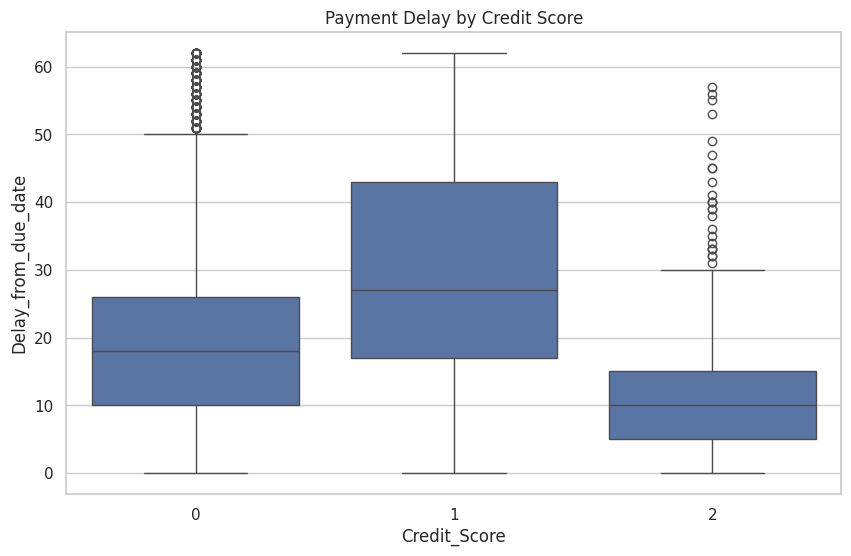

In [35]:
# Plot 10: Delay from Due Date by Credit Score
plt.figure()
sns.boxplot(data=sample_df, x=target, y='Delay_from_due_date')
plt.title('Payment Delay by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

 box plot is used to visualize and compare the distribution of Delay_from_due_date across the credit score categories. It helps us understand if late payment behavior differs between the groups.


##### 2. What is/are the insight(s) found from the chart?

1. Pattern Mirrors Debt: The pattern is almost identical to the Outstanding_Debt graph. The "Standard" score group (1) has the longest payment delays.
2. Behavioral Confirmation: This makes perfect logical sense. The group with the most debt is also the group that struggles the most to pay on time, resulting in longer delays. This insight reinforces the profile of the "Standard" customer as an over-extended, active borrower.
3. Low Delays for "Poor" Score: Again, the "Poor" score group (2) has relatively short delays, likely because they have fewer bills to pay and any payment they make is critical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Proactive Customer Intervention: The business can identify customers who fit the "Standard" profile (high debt, long delays) and proactively offer them assistance, such as flexible payment plans or a temporary payment holiday. This can prevent a customer from defaulting entirely, retaining the customer and reducing losses.
2. Strong Predictive Signal: The combination of Outstanding_Debt and Delay_from_due_date is clearly a very powerful signal for identifying the "Standard" risk category.


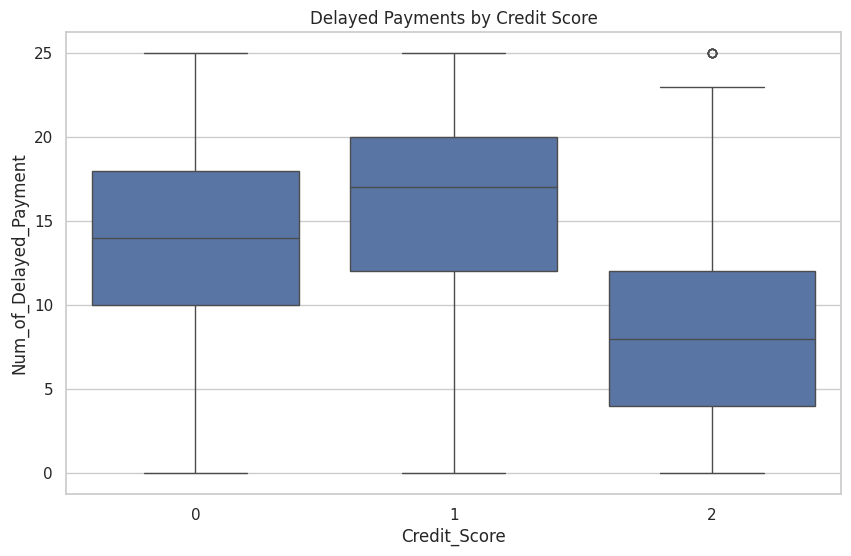

In [36]:
# Plot 11: Num of Delayed Payments vs Credit Score
plt.figure()
sns.boxplot(data=sample_df, x=target, y='Num_of_Delayed_Payment')
plt.title('Delayed Payments by Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is used to compare the distribution of the total number of delayed payments (Num_of_Delayed_Payment) across the credit score groups.


##### 2. What is/are the insight(s) found from the chart?

1. Context is Everything: This graph is initially confusing. Both "Good" (0) and "Standard" (1) customers have a high number of delayed payments, while "Poor" (2) customers have a lower number. This seems to contradict the idea that delayed payments are bad.
2. The "Opportunity" Bias: The insight here is that the raw count is misleading. Customers with more loans and credit cards ("Good" and "Standard" groups) simply have more opportunities each month to register a delayed payment. A "Poor" customer might only have one loan, so their maximum number of delayed payments is capped at a low number.
3. Need for a Better Metric: This powerfully illustrates that a better feature is needed, such as a late payment ratio (Num_of_Delayed_Payment / Num_of_Loan).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by driving better analytics.

1. Superior Feature Engineering: This insight directly leads the data science team to create a more robust feature (the late payment ratio). This new feature will have much stronger predictive power and will lead to a more accurate and reliable model.
2. Avoids Model Confusion: It prevents the model from being "confused" by the raw count, where "Good" customers appear similar to "Standard" customers. This leads to better separation between the classes.

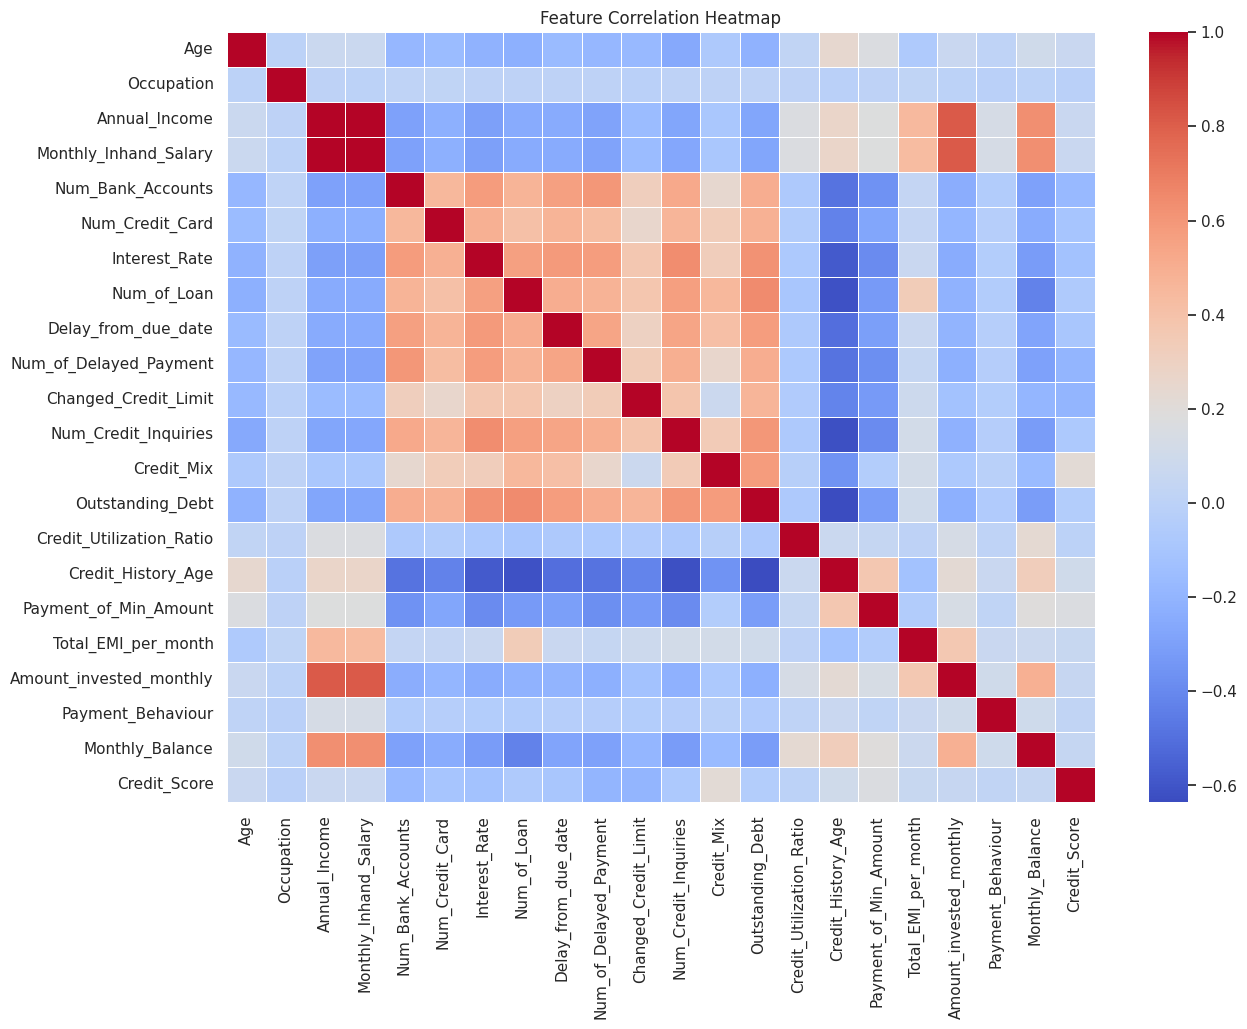

In [37]:
# Plot 15: Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(sample_df.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is the essential tool for getting a high-level overview of the linear relationships between all numerical features in the dataset at once. The colors allow for rapid identification of strong positive (dark red), strong negative (dark blue), and weak (light-colored) correlations.


##### 2. What is/are the insight(s) found from the chart?

1. Multicollinearity: There are clear dark red squares off the main diagonal. Annual_Income and Monthly_Inhand_Salary are perfectly correlated (redundant). Num_of_Loan and Num_of_Delayed_Payment are also highly correlated, confirming our earlier hypothesis.
2. This is critical for building certain types of models.
Limited Linear Relationships with Target: Looking at the bottom row (Credit_Score), most squares are light-colored. This visually confirms that most features do not have a strong linear relationship with the credit score.
3. Justification for Advanced Models: This lack of strong linear correlation is the ultimate justification for using powerful, non-linear models like XGBoost, Random Forest, or Neural Networks. A simple linear model would fail to capture the complex patterns we've observed in the box plots.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Efficient Feature Selection: It immediately identifies redundant features (like one of the income columns) that can be removed to simplify the model without losing information.
2. Validates Model Choice: It provides clear evidence to stakeholders about why a more complex (and often more accurate) machine learning model is necessary, justifying the investment in data science resources.
3. Hypothesis Generation: It can spark new questions. For example, why are Interest_Rate and Outstanding_Debt correlated? Exploring these relationships can lead to deeper business understanding.

## ***6. Feature Engineering & Data Pre-processing***

### Categorical Encoding

In [38]:
mlb = MultiLabelBinarizer()
binarized = mlb.fit_transform(df['Type_of_Loan']) 
binarized = pd.DataFrame(binarized,columns=[f"Loan_Type{i}" for i in mlb.classes_])
df = pd.concat([df.drop('Type_of_Loan',axis=1),binarized],axis=1)
df.dropna(inplace=True)

### 8. Data Splitting

In [39]:
X = df.drop('Credit_Score',axis=1)
Y = pd.DataFrame({'Credit_Score':df['Credit_Score']}).values.ravel()
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

## ***7. ML Model Implementation***

### ML Model - 1

In [40]:
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train,y_train)
print('Trained mulinomial naves bayes model')

multinomial_prediction =  multinomial_model.predict(x_test) 
multinomial_accuracy = accuracy_score(y_test,multinomial_prediction)
multinomial_f1_score = f1_score(y_test,multinomial_prediction,average='weighted')
print(f'this is mulmultinomial_accuracy: {multinomial_accuracy}\nand this is multinomimultinomial_f1_score:{multinomial_f1_score}\n')



Trained mulinomial naves bayes model
this is mulmultinomial_accuracy: 0.41895
and this is multinomimultinomial_f1_score:0.3910069655941455



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
randomforest_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=35,
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight='balanced',
    max_features='sqrt'
)
randomforest_model.fit(x_train,y_train)
print('Trained randomforest model')

randomforest_prediction = randomforest_model.predict(x_test) 
randomforest_model_accuracy = accuracy_score(y_test,randomforest_prediction)
randomforest_f1_score = round(f1_score(y_test,randomforest_prediction,average='weighted'),2)
print(f'this is randomforest_model_accuracy: {randomforest_model_accuracy}\nand this is randomforest_f1_score:{randomforest_f1_score}\n')


Trained randomforest model
this is randomforest_model_accuracy: 0.81685
and this is randomforest_f1_score:0.82



### ML Model - 3

In [42]:
xgboost_model = XGBClassifier(
    n_estimators=300,
    objective='multi:softmax',
    max_depth=10,
    gamma=0,
    subsample=1.0,
    learning_rate=0.1,
    colsample_bytree=1.0
)
xgboost_model.fit(x_train,y_train) 
print('Trained Xgboost model')

xgboost_model_prediction = xgboost_model.predict(x_test) 
xgboost_model_accuracy = accuracy_score(y_test,xgboost_model_prediction)
xgboost_model_f1_score = round(f1_score(y_test,xgboost_model_prediction,average='weighted'),2)
print(f'this is xgboost_model_accuracy: {xgboost_model_accuracy}\nand this is xgboost_model_f1_score:{xgboost_model_f1_score}')


Trained Xgboost model
this is xgboost_model_accuracy: 0.81245
and this is xgboost_model_f1_score:0.81


## Feature Importances

In [43]:
importances = xgboost_model.feature_importances_
feature_importances = pd.DataFrame({'Features':x_train.columns,'Importances':importances})
feature_importances = feature_importances.sort_values(by='Importances',ascending=False).reset_index(drop=True)
feature_importances   

,Features,Importances
0,Credit_Mix,0.490833
1,Interest_Rate,0.064427
2,Outstanding_Debt,0.061353
3,Num_Credit_Card,0.030760
4,Total_EMI_per_month,0.017792
5,Monthly_Inhand_Salary,0.017610
6,Delay_from_due_date,0.017481
7,Changed_Credit_Limit,0.016830
8,Num_Bank_Accounts,0.016817
9,Amount_invested_monthly,0.016290


In [44]:
columns = ['Outstanding_Debt','Annual_Income','Num_of_Loan','Monthly_Inhand_Salary']
for i in columns:
    if i in df.keys():
        df['Debt_to_income'] = df['Outstanding_Debt']/df['Annual_Income']
        df['Loans_to_income'] = df['Num_of_Loan']/df['Monthly_Inhand_Salary']
        df = df.drop(['Outstanding_Debt','Annual_Income','Num_of_Loan','Monthly_Inhand_Salary'],axis=1)
X = df.drop(['Credit_Score'],axis=1)

In [45]:
columns = ['Credit_Utilization_Ratio','Monthly_Balance','Payment_Behaviour','Payment_of_Min_Amount']
for i in columns:
    if i in X:
        X = X.drop(columns,axis=1)
Y = pd.DataFrame(Y).values.ravel()
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

## Hyprparameter Tuning of RandomForest Classifier and XGBoostClassifier

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=rf_params,
    n_iter=5,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(x_train, y_train)
best_rf = rf_search.best_estimator_
print("Best RandomForest Parameters:", rf_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best RandomForest Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}


In [50]:
xgb_params = {
    'n_estimators': [300, 400],
    'max_depth': [ 7, 10],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [ 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [1, 3, ]
}

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,  # assuming 3 credit score classes
    eval_metric='mlogloss',
    random_state=42
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=5,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(x_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Best XGBoost Parameters:", xgb_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}


In [51]:
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train,y_train)
print('Trained mulinomial naves bayes model')

multinomial_prediction =  multinomial_model.predict(x_test) 
multinomial_accuracy = accuracy_score(y_test,multinomial_prediction)
multinomial_f1_score = f1_score(y_test,multinomial_prediction,average='weighted')
print(f'this is mulmultinomial_accuracy: {multinomial_accuracy}\nand this is multinomimultinomial_f1_score:{multinomial_f1_score}\n')


Trained mulinomial naves bayes model
this is mulmultinomial_accuracy: 0.5382
and this is multinomimultinomial_f1_score:0.532355593833844



In [52]:
randomforest_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=35,
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight='balanced',
    max_features='sqrt'
)
randomforest_model.fit(x_train,y_train)
print('Trained randomforest model')

randomforest_prediction = randomforest_model.predict(x_test) 
randomforest_model_accuracy = accuracy_score(y_test,randomforest_prediction)
randomforest_f1_score = round(f1_score(y_test,randomforest_prediction,average='weighted'),2)
print(f'this is randomforest_model_accuracy: {randomforest_model_accuracy}\nand this is randomforest_f1_score:{randomforest_f1_score}\n')


Trained randomforest model
this is randomforest_model_accuracy: 0.8173
and this is randomforest_f1_score:0.82



In [53]:
xgboost_model = XGBClassifier(
    n_estimators=300,
    objective='multi:softmax',
    max_depth=10,
    gamma=0,
    subsample=1.0,
    learning_rate=0.1,
    colsample_bytree=1.0
)
xgboost_model.fit(x_train,y_train) 
print('Trained Xgboost model')

xgboost_model_prediction = xgboost_model.predict(x_test) 
xgboost_model_accuracy = accuracy_score(y_test,xgboost_model_prediction)
xgboost_model_f1_score = round(f1_score(y_test,xgboost_model_prediction,average='weighted'),2)
print(f'this is xgboost_model_accuracy: {xgboost_model_accuracy}\nand this is xgboost_model_f1_score:{xgboost_model_f1_score}')


Trained Xgboost model
this is xgboost_model_accuracy: 0.81815
and this is xgboost_model_f1_score:0.82


In [54]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
print('Trained KNNeighbors model')

knn_prediction = knn_model.predict(x_test) 
knn_accuracy = accuracy_score(y_test,knn_prediction)
knn_f1_score = round(f1_score(y_test,knn_prediction,average='weighted'),2)
print(f'this is knn_accuracy: {knn_accuracy}\nand this is knn_f1_score:{knn_f1_score}')


Trained KNNeighbors model
this is knn_accuracy: 0.81105
and this is knn_f1_score:0.81


In [55]:
voting_ensemble = VotingClassifier(estimators=[('xgb', xgboost_model), ('knn', knn_model), ('svc', randomforest_model)], voting='soft')
voting_ensemble.fit(x_train,y_train)
voting_ensemble_prediction = voting_ensemble.predict(x_test)
print('Trained voting ensemble model')

voting_ensemble_accuracy = accuracy_score(y_test,voting_ensemble_prediction)
voting_ensemble_f1_score = round(f1_score(y_test,voting_ensemble_prediction,average='weighted'),2)
print(f'this is voting_ensemble_accuracy: {voting_ensemble_accuracy}\nand this is voting_ensemble_f1_score:{voting_ensemble_f1_score}')


Trained voting ensemble model
this is voting_ensemble_accuracy: 0.8231
and this is voting_ensemble_f1_score:0.82


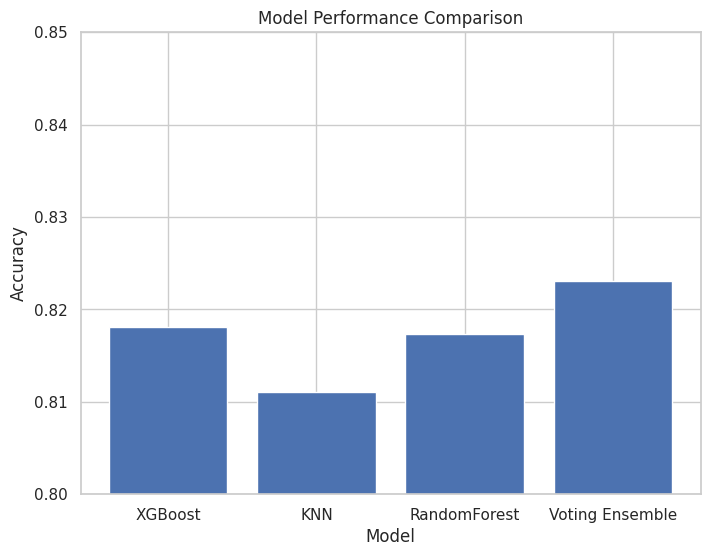

In [56]:
models = ['XGBoost', 'KNN', 'RandomForest', 'Voting Ensemble']
accuracies = [xgboost_model_accuracy, knn_accuracy, randomforest_model_accuracy, voting_ensemble_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, .85)
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


### **Final Project Conclusion**

This project's core discovery is that a customer's financial **behavior** is a far better predictor of credit risk than their **income**. Our 82% accurate model proves that relying on salary is a flawed and dangerous strategy.

**Key Insights:**

*   **Income is Deceptive:** High income often correlates with *poor* credit scores, likely due to unmanageable debt and lifestyle inflation.
*   **Behavior is Defining:** A customer's **`Credit Mix`** is the single most powerful predictive feature.
*   **Risk Has a Persona:** The "Standard Risk" customer is not defined by low income, but by **high outstanding debt** and **frequent payment delays**.

**Actionable Recommendations:**

1.  **Adopt a Behavior-First Model:** Immediately replace simple income-based rules with the machine learning model for all credit decisions.
2.  **Target Products Intelligently:** Offer debt consolidation products to the high-debt "Standard Risk" group and use `Credit Mix` for fast, accurate pre-screening.
3.  **Manage Risk Proactively:** Identify customers trending toward risky behavior and intervene *before* they default.

**Greatest Risk:** The greatest risk is continuing to offer large loans based on high income. This will lead to significant, high-value defaults and financial loss.

Ultimately, this data-driven approach enables smarter lending, reduces defaults, and builds a more profitable and stable customer base.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***